# Thera Bank Personal Loan Campaign

### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (\$000)
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (\$000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (\$000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Steps and tasks:
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
    - Number of unique in each column?
    - Number of people with zero mortgage?
    - Number of people with zero credit card spending per month?
    - Value counts of all categorical columns.
    - Univariate and Bivariate
    - Get data model ready
3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
6. Give conclusion related to the Business understanding of your model? (5 marks)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.express as px

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='newton-cg')

from sklearn.model_selection import train_test_split as tts

from sklearn.impute import SimpleImputer as si

from sklearn import metrics as mtr

import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format        

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

sns.set_style(style='darkgrid')

In [3]:
# Reading file
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# Renaming columns for ease of working with them
df.rename(columns={'ZIP Code':'Zipcode','Personal Loan':'AccptPersLoan','Securities Account':'HaveSecAcct','CD Account':'HaveCDAcct','Online':'HaveOnline','CreditCard':'HaveCC'},inplace=True)

#Checking data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID               5000 non-null int64
Age              5000 non-null int64
Experience       5000 non-null int64
Income           5000 non-null int64
Zipcode          5000 non-null int64
Family           5000 non-null int64
CCAvg            5000 non-null float64
Education        5000 non-null int64
Mortgage         5000 non-null int64
AccptPersLoan    5000 non-null int64
HaveSecAcct      5000 non-null int64
HaveCDAcct       5000 non-null int64
HaveOnline       5000 non-null int64
HaveCC           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Getting Data-set ready

In [4]:
# Dropping ID column since that is an identifier and not a feature
df.drop('ID', axis=1, inplace=True)

In [5]:
# Dropping observations with incorrect data (with outlier 4 digit Zipcode)
df.drop(df[df.Zipcode < 90000].index, inplace=True)

In [6]:
# Converting zipcode to bins
ziplabels = ['900-905','905-910','910-915','915-920','920-925','925-930','930-935','935-940','940-945','945-950','950-955','955-960','960+']
df['Zipcode'] = pd.cut(df.Zipcode, bins=[90000, 90500, 91000, 91500, 92000, 92500, 93000, 93500, 94000, 94500, 95000, 95500, 96000,100000], labels=ziplabels)
# df.head()

In [7]:
# # Checking for acceptance of loans across the zipcodes

# fig = px.histogram(df, x='Zipcode', color='AccptPersLoan', barmode='group',
#                   category_orders={'Zipcode': ziplabels},
#                    width=1000)
# fig.show()

In [8]:
# Dropping observations with incorrect data (with Experience less than zero)
df.drop(df[df.Experience < 0 ].index, inplace=True)

In [9]:
# # Checking distribution of CC Average
# fig = px.histogram(df, x='CCAvg', marginal='rug', width=1000)
# fig.show()

In [10]:
# Converting CC Average to bins - given it is already represented in '000s'
cclabels = ['0-1K','1-2K','2-3K','3-4K','4-5K','5-8K','8K+']
df['CCAvg'] = pd.cut(df.CCAvg, bins=[0, 1, 2, 3, 4, 5, 8,12], labels=cclabels)
# df.head()

In [11]:
df.Family = df.Family.astype('category')
df.Education = df.Education.astype('category')

In [12]:
df = pd.get_dummies(df)

In [13]:
# df.describe().T

In [14]:
# df.info()

##### Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [15]:
dfy = df[['AccptPersLoan']].copy()
dfX = df.drop('AccptPersLoan',axis=1).copy()

In [16]:
X_train, X_test, y_train, y_test = tts(dfX, dfy, test_size=0.3, random_state=1)

In [17]:
# X_test.describe().T

##### Use the Logistic Regression model to predict whether the customer will take a personal loan or not.<br>Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). <br>Draw a heatmap to display confusion matrix (15 marks)

In [18]:
logit.fit(X_train,y_train)
print('Training score : ',logit.score(X_train, y_train))

logit.fit(X_test,y_test)
print('Test score : ',logit.score(X_test, y_test))

Training score :  0.9647602541883304
Test score :  0.9656565656565657


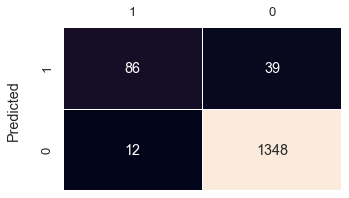

In [19]:
y_predict = logit.predict(X_test)
cmat = mtr.confusion_matrix(y_test,y_predict, labels=[1,0])

dfcm = pd.DataFrame(cmat, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

In [20]:
npcm = np.array(cmat)
print('Accuracy of the model : ',npcm.trace()/npcm.sum())
print('Recall of the model : ',npcm[0,0]/npcm[:,0].sum())
print('Precision of the model : ',npcm[0,0]/npcm[0].sum())

Accuracy of the model :  0.9656565656565657
Recall of the model :  0.8775510204081632
Precision of the model :  0.688


In [21]:
appr0 = np.array([[npcm.trace()/npcm.sum()],[npcm[0,0]/npcm[:,0].sum()],[npcm[0,0]/npcm[0].sum()]])
appr0

array([[0.96565657],
       [0.87755102],
       [0.688     ]])

### Iteration1

In [22]:
df1 = df.copy()
df1['HasMortgage'] = df1.Mortgage.apply(lambda x : 1 if( x > 0) else 0)

#### Note: 
1. Introducing a Categorical variable 'HasMortgage' similar to other categorical variables before applying transformation
2. Given the extreme skewness of Mortgage amounts, applying a Log transformation

In [23]:
df1.Mortgage = df1.Mortgage.apply(lambda x: 1 if(x == 0) else x)
df1['Mortgage_Log'] = np.log(df1.Mortgage)

# fig = px.box(df1, x='Mortgage', width=1000, height=200)
# fig.show()

# fig = px.box(df1, x='Mortgage_Log', width=1000, height=200)
# fig.show()

In [24]:
dfy1 = df1[['AccptPersLoan']].copy()
dfX1 = df1.drop(['AccptPersLoan','Mortgage'],axis=1).copy()

In [25]:
X1_train, X1_test, y1_train, y1_test = tts(dfX1, dfy1, test_size=0.3, random_state=30)

In [26]:
y1_train.AccptPersLoan.value_counts(normalize=True)*100

0   89.83
1   10.17
Name: AccptPersLoan, dtype: float64

In [27]:
logit.fit(X1_train,y1_train)
print('Training score : ',logit.score(X1_train, y1_train))

logit.fit(X1_test,y1_test)
print('Test score : ',logit.score(X1_test, y1_test))

Training score :  0.9647602541883304
Test score :  0.9717171717171718


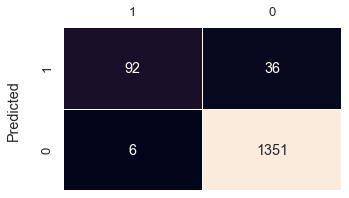

In [28]:
y1_predict = logit.predict(X1_test)
cmat1 = mtr.confusion_matrix(y1_test,y1_predict, labels=[1,0])

dfcm1 = pd.DataFrame(cmat1, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm1, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

In [29]:
npcm1 = np.array(cmat1)
print('Accuracy of the model : ',npcm1.trace()/npcm1.sum())
print('Recall of the model : ',npcm1[0,0]/npcm1[:,0].sum())
print('Precision of the model : ',npcm1[0,0]/npcm1[0].sum())

Accuracy of the model :  0.9717171717171718
Recall of the model :  0.9387755102040817
Precision of the model :  0.71875


In [30]:
appr1 = np.array([[npcm1.trace()/npcm1.sum()],[npcm1[0,0]/npcm1[:,0].sum()],[npcm1[0,0]/npcm1[0].sum()]])
appr1

array([[0.97171717],
       [0.93877551],
       [0.71875   ]])

### Iteration 2

In [31]:
df2 = df1.copy()

In [32]:
df2['Income_Log'] = np.log(df2.Income)

# fig = px.box(df2, x='Income', width=1000, height=200)
# fig.show()

# fig = px.box(df2, x='Income_Log', width=1000, height=200)
# fig.show()

In [33]:
dfy2 = df2[['AccptPersLoan']].copy()
dfX2 = df2.drop(['AccptPersLoan','Income'],axis=1).copy()

In [34]:
X2_train, X2_test, y2_train, y2_test = tts(dfX2, dfy2, test_size=0.3, random_state=30)

In [35]:
y2_train.AccptPersLoan.value_counts(normalize=True)*100

0   89.83
1   10.17
Name: AccptPersLoan, dtype: float64

In [36]:
logit.fit(X2_train,y2_train)
print('Training score : ',logit.score(X2_train, y2_train))

logit.fit(X2_test,y2_test)
print('Test score : ',logit.score(X2_test, y2_test))

Training score :  0.9682264586943963
Test score :  0.9744107744107744


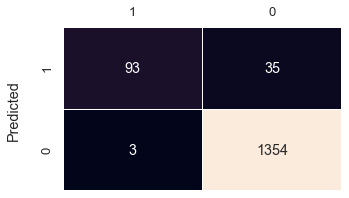

In [37]:
y2_predict = logit.predict(X2_test)
cmat2 = mtr.confusion_matrix(y2_test,y2_predict, labels=[1,0])

dfcm2 = pd.DataFrame(cmat2, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm2, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

In [38]:
npcm2 = np.array(cmat2)
print('Accuracy of the model : ',npcm2.trace()/npcm2.sum())
print('Recall of the model : ',npcm2[0,0]/npcm2[:,0].sum())
print('Precision of the model : ',npcm2[0,0]/npcm2[0].sum())

Accuracy of the model :  0.9744107744107744
Recall of the model :  0.96875
Precision of the model :  0.7265625


In [39]:
appr2 = np.array([[npcm2.trace()/npcm2.sum()],[npcm2[0,0]/npcm2[:,0].sum()],[npcm2[0,0]/npcm2[0].sum()]])
appr2

array([[0.97441077],
       [0.96875   ],
       [0.7265625 ]])

### Summary:
Comparing the results of the three approaches:

In [40]:
compare = pd.DataFrame('',index=['Accuracy','Recall','Precision'],columns=['Initial','Iteration1','Iteration2'])

In [41]:
compare.Initial = appr0
compare.Iteration1 = appr1
compare.Iteration2 = appr2
pd.options.display.float_format = '{:,.4f}'.format  
compare

,Initial,Iteration1,Iteration2
Accuracy,0.9657,0.9717,0.9744
Recall,0.8776,0.9388,0.9688
Precision,0.6880,0.7188,0.7266


### Summary: Iteration 2 seems to have the best results for the given data and model
<br/>

## Comparing the model using 'Class_weight'

Training score :  0.9682264586943963
Test score :  0.9744107744107744


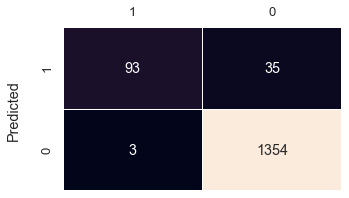

Training score :  0.9185441941074524
Test score :  0.9407407407407408


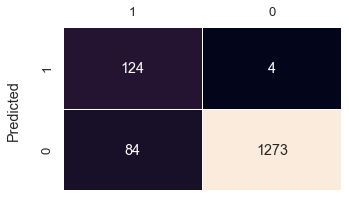

In [42]:
logit1 = LogisticRegression(solver='newton-cg')
logit2 = LogisticRegression(solver='newton-cg', class_weight='balanced')

logit1.fit(X2_train,y2_train)
print('Training score : ',logit1.score(X2_train, y2_train))

logit1.fit(X2_test,y2_test)
print('Test score : ',logit1.score(X2_test, y2_test))

y21_predict = logit1.predict(X2_test)
cmat21 = mtr.confusion_matrix(y2_test,y21_predict, labels=[1,0])
dfcm21 = pd.DataFrame(cmat21, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm21, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

logit2.fit(X2_train,y2_train)
print('Training score : ',logit2.score(X2_train, y2_train))

logit2.fit(X2_test,y2_test)
print('Test score : ',logit2.score(X2_test, y2_test))

y22_predict = logit2.predict(X2_test)
cmat22 = mtr.confusion_matrix(y2_test,y22_predict, labels=[1,0])
dfcm22 = pd.DataFrame(cmat22, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm22, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

## Validation using Stats Model

In [45]:
dfcoef = pd.DataFrame({'Attributes':list(X2_test.columns),'Coefficient':list(logit2.coef_[0])})
dfcoef.sort_values('Coefficient', ascending=False)

,Attributes,Coefficient
36,Income_Log,6.9501
4,HaveCDAcct,4.2919
27,CCAvg_3-4K,1.8163
23,Family_4,1.4623
33,Education_3,1.4437
32,Education_2,1.0029
28,CCAvg_4-5K,0.9366
8,Zipcode_905-910,0.6412
22,Family_3,0.5810
13,Zipcode_930-935,0.3990


In [43]:
X_tr = sm.add_constant(X2_train)
smlogit = sm.Logit(y2_train, X_tr)
smlg = smlogit.fit(method='newton')
# smlg = smlogit.fit(method='newton')
smlg.summary2()

         Current function value: 0.094349
         Iterations: 35


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                  Pseudo R-squared:       0.713   
Dependent Variable:        AccptPersLoan          AIC:                    723.2719
Date:                      2020-11-08 13:44       BIC:                    938.5079
No. Observations:          3462                   Log-Likelihood:         -326.64 
Df Model:                  34                     LL-Null:                -1138.1 
Df Residuals:              3427                   LLR p-value:            0.0000  
Converged:                 0.0000                 Scale:                  1.0000  
No. Iterations:            35.0000                                                
----------------------------------------------------------------------------------
                 Coef.      Std.Err.      z    P>|z|      [0.025         0.975]   
----------------------------------------------------------------------------------
const           -33.4967 11314570.8975 -0.0000 1.0000 -22176184.9562 22176117.9629
Age              -0.0221        0.0938 -0.2351 0.8141        -0.2060        0.1619
Experience        0.0377        0.0932  0.4040 0.6862        -0.1450        0.2203
Mortgage         -0.0024        0.0058 -0.4150 0.6782        -0.0137        0.0089
HaveSecAcct      -0.6311        0.4051 -1.5580 0.1192        -1.4250        0.1628
HaveCDAcct        3.3905        0.4663  7.2715 0.0000         2.4766        4.3044
HaveOnline       -0.8561        0.2287 -3.7427 0.0002        -1.3043       -0.4078
HaveCC           -0.8898        0.2796 -3.1829 0.0015        -1.4377       -0.3419
Zipcode_900-905  -2.1979 13155480.5442 -0.0000 1.0000 -25784270.2639 25784265.8680
Zipcode_905-910  -1.5399 13297129.3219 -0.0000 1.0000 -26061896.1086 26061893.0288
Zipcode_910-915  -1.7655 13329307.3990 -0.0000 1.0000 -26124964.2064 26124960.6754
Zipcode_915-920  -2.7362 13179304.8849 -0.0000 1.0000 -25830965.6519 25830960.1795
Zipcode_920-925  -1.9662 13051140.9584 -0.0000 1.0000 -25579768.2019 25579764.2695
Zipcode_925-930  -1.9050 13152921.1430 -0.0000 1.0000 -25779253.6367 25779249.8267
Zipcode_930-935  -1.8558 13096501.4503 -0.0000 1.0000 -25668673.0217 25668669.3102
Zipcode_935-940  -3.2500 13304630.7033 -0.0000 1.0000 -26076600.2560 26076593.7560
Zipcode_940-945  -2.2207 13215632.9413 -0.0000 1.0000 -25902166.8185 25902162.3770
Zipcode_945-950  -2.1366 13243096.3699 -0.0000 1.0000 -25955994.0653 25955989.7921
Zipcode_950-955  -1.8281 13161285.5306 -0.0000 1.0000 -25795647.4583 25795643.8021
Zipcode_955-960  -2.0218 13255812.9010 -0.0000 1.0000 -25980917.8935 25980913.8499
Zipcode_960+     -3.1908 13221839.0896 -0.0000 1.0000 -25914331.6158 25914325.2342
Family_1         -9.6161 10499961.6845 -0.0000 1.0000 -20579556.3569 20579537.1246
Family_2        -10.0546 10507649.7723 -0.0000 1.0000 -20594625.1704 20594605.0613
Family_3         -7.0546 10490140.6378 -0.0000 1.0000 -20560304.8975 20560290.7883
Family_4         -7.9447 10519720.9754 -0.0000 1.0000 -20618282.1840 20618266.2946
CCAvg_0-1K       13.7346      858.7675  0.0160 0.9872     -1669.4188     1696.8881
CCAvg_1-2K       13.0720      858.7675  0.0152 0.9879     -1670.0814     1696.2255
CCAvg_2-3K       14.0936      858.7675  0.0164 0.9869     -1669.0598     1697.2469
CCAvg_3-4K       15.9582      858.7675  0.0186 0.9852     -1667.1952     1699.1116
CCAvg_4-5K       15.6047      858.7675  0.0182 0.9855     -1667.5487     1698.7581
CCAvg_5-8K       14.8586      858.7675  0.0173 0.9862     -1668.2948     1698.0120
CCAvg_8K+        12.7938      858.7678  0.0149 0.9881     -1670.3603     1695.9478
Education_1     -13.7833           nan     nan    nan            nan           nan
Education_2      -9.8105           nan     nan    nan            nan           nan
Education_3      -9.8409           nan     nan    nan            nan           nan
H

#### Questions:

1. Based on StatsModel P values, only 'Income', 'HaveCDAcct', 'HaveOnline' and  'HaveCC' have less that 0.05 value - In spite of what the co-efficients say in the Logit model, would only these 4 features have a real influence on the likelihood of customer accepting the loan??? 
2. Why are the P values NULL for Education?
3. What does P value of 1.0 mean? Absolutely no influence?
4. What does P value of 0 mean? High influence?
5. Does Sklearn have another parameter like P value to indicate the influence of each of these features?

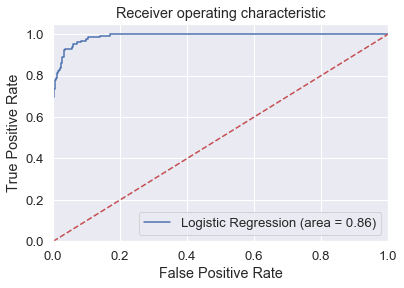

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y2_test, logit.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y2_test, logit.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()